In [1]:
from pathlib import Path

import os
import pylab as plt
from skimage import io
import numpy as np
import json
import torch
import argparse
import albumentations as A
from tracenet.utils.loader import get_loaders
from tracenet.utils.plot import plot_keypoints, plot_traces, show_imgs
from tracenet.models._utils import get_model

In [2]:
data_dir = '/research/sharedresources/cbi/data_exchange/hangrp/Development/mt_detection/data/training_data'
img_dir = 'img'
gt_dir = 'traces'
mean_std = (595.72, 1159.925)

train_dir = 'train'
val_dir = 'val'
bs = 1

In [3]:
train_dl, val_dl = get_loaders(data_dir, train_dir=train_dir, val_dir=val_dir, 
                               img_dir=img_dir, gt_dir=gt_dir, batch_size=bs, 
                               mean_std=mean_std, shuffle=False)
ind = 0

In [4]:
models = ['lucky-music-3', 'vital-dragon-7', 'ancient-thunder-17', 'spring-glade-23']

## Prediction

In [5]:
outputs = []
for model in models:
    output = []
    model_path = rf'models_backbone_mt/{model}/best_model.pth'

    # load the model
    with open(os.path.join(os.path.dirname(model_path), 'config.json')) as f:
        config = json.load(f)
        
    net = get_model(config=argparse.Namespace(**config)).cuda()
    net.load_state_dict(torch.load(model_path))
    net.eval();
    
    # predict
    for imgs, _, targets in val_dl:
        with torch.no_grad():
            output.append(net(imgs.cuda()).cpu().argmax(1))
    outputs.append(output)

Low image data range; displaying image with stretched contrast.


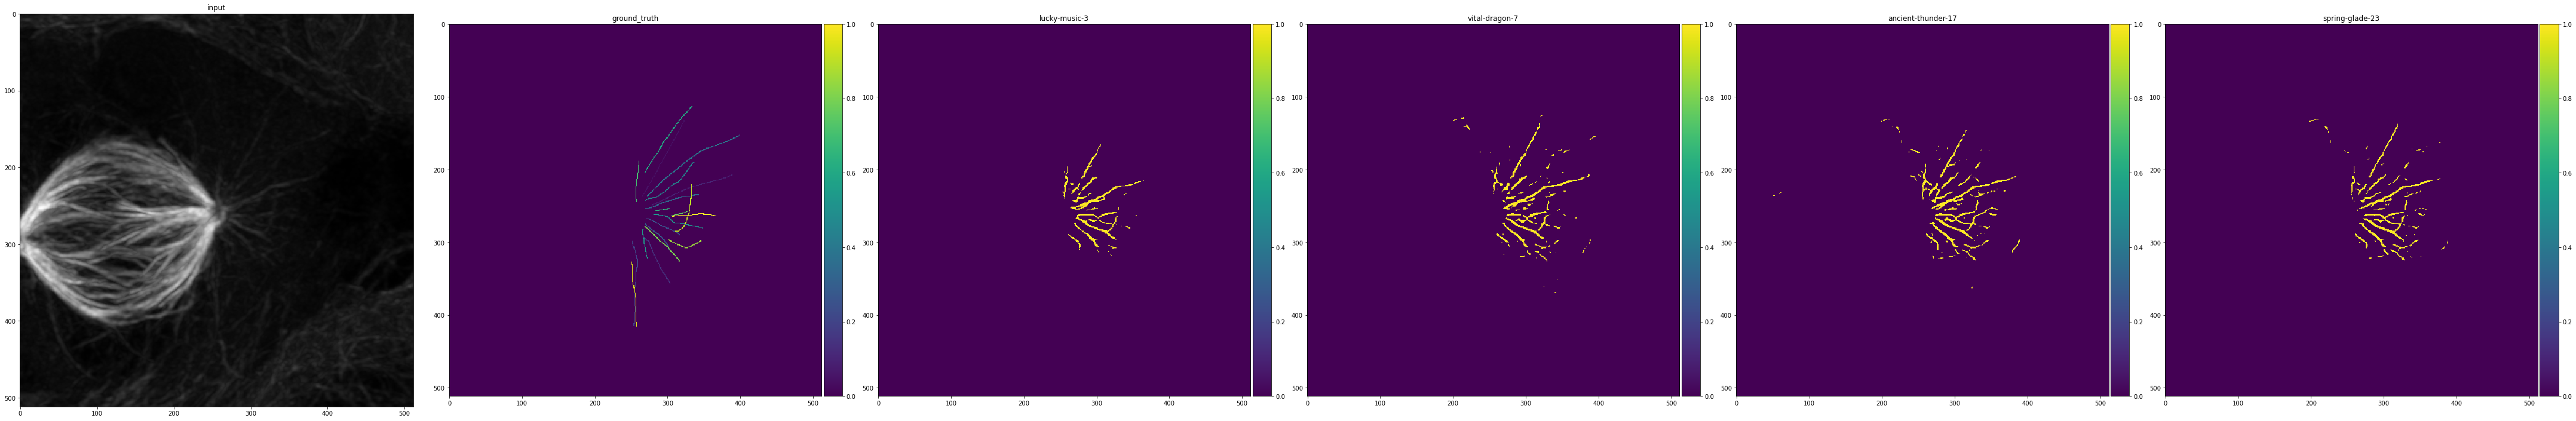

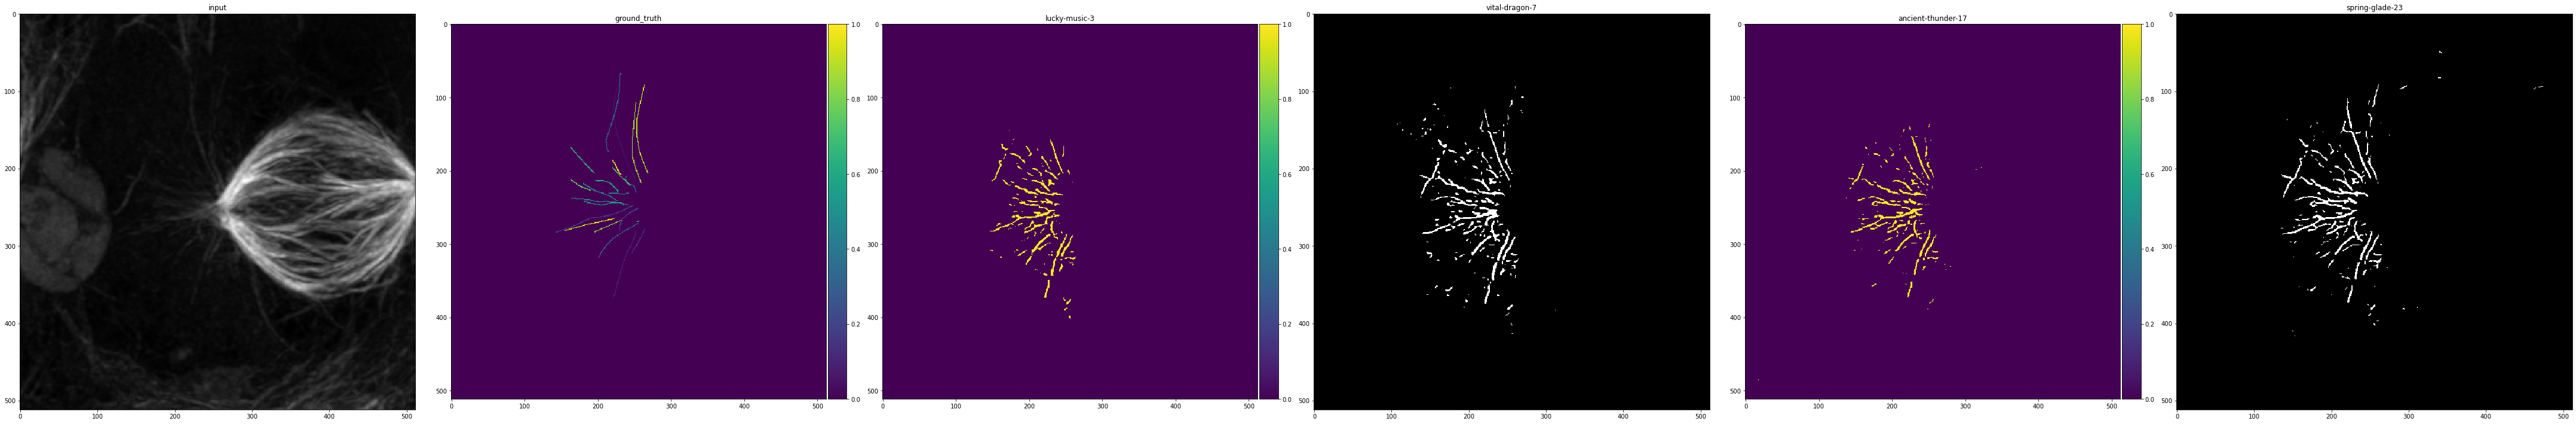

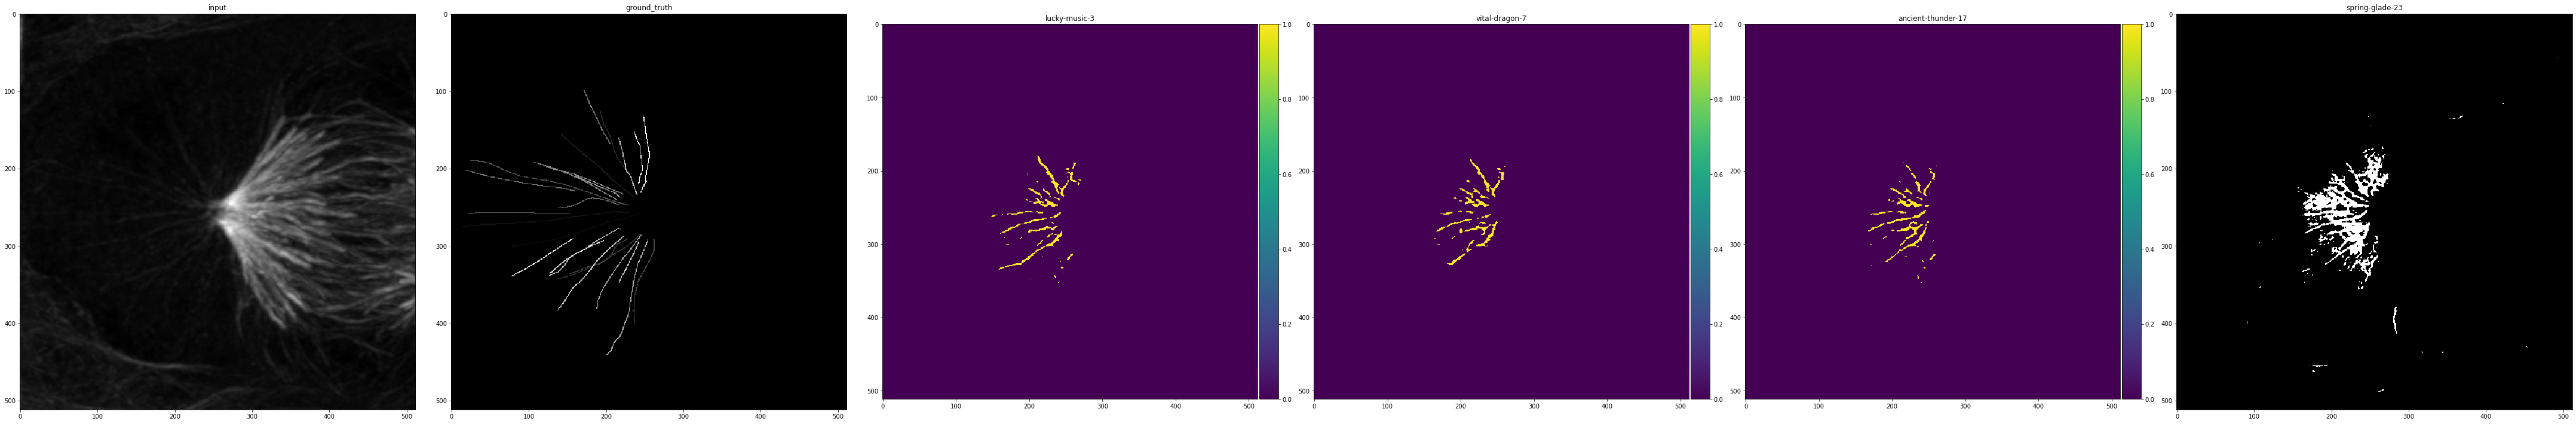

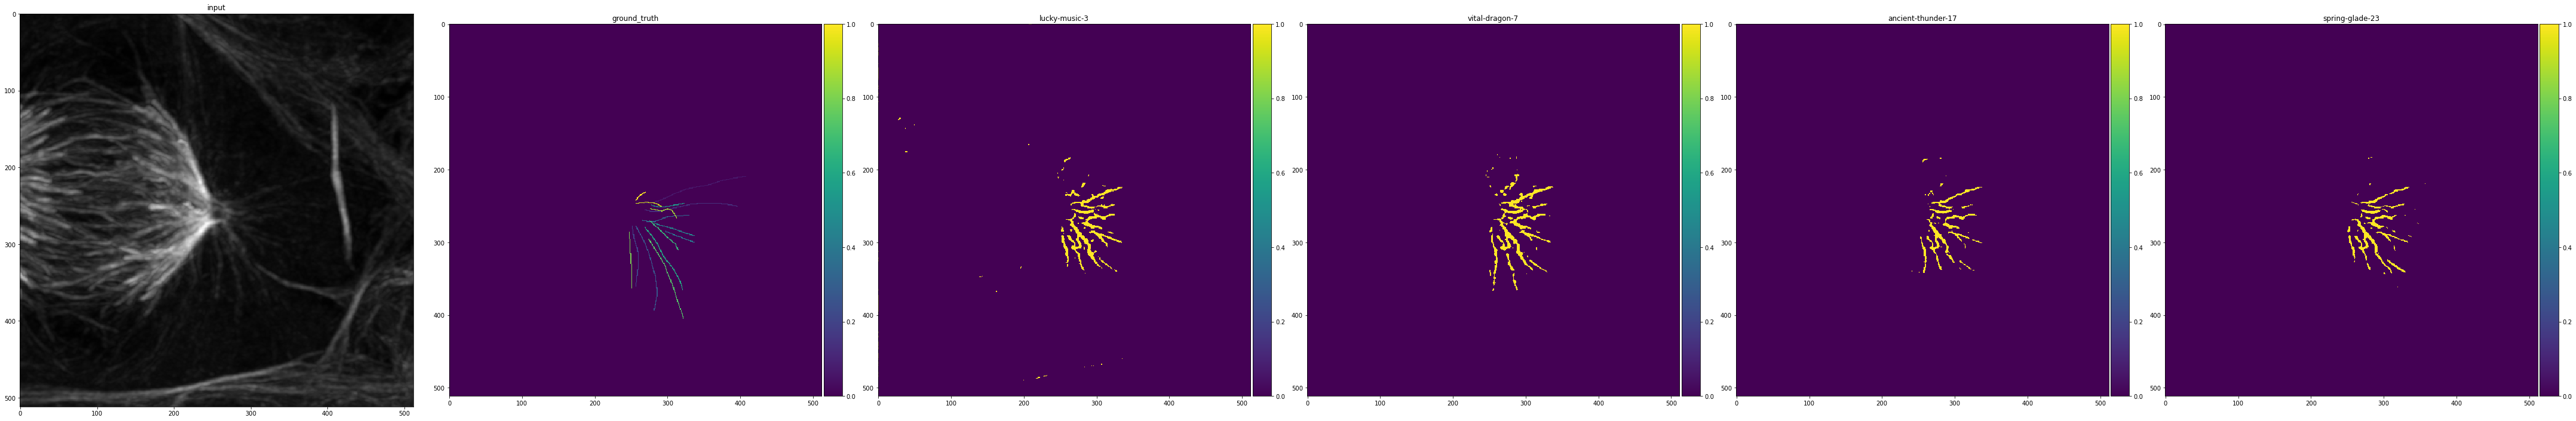

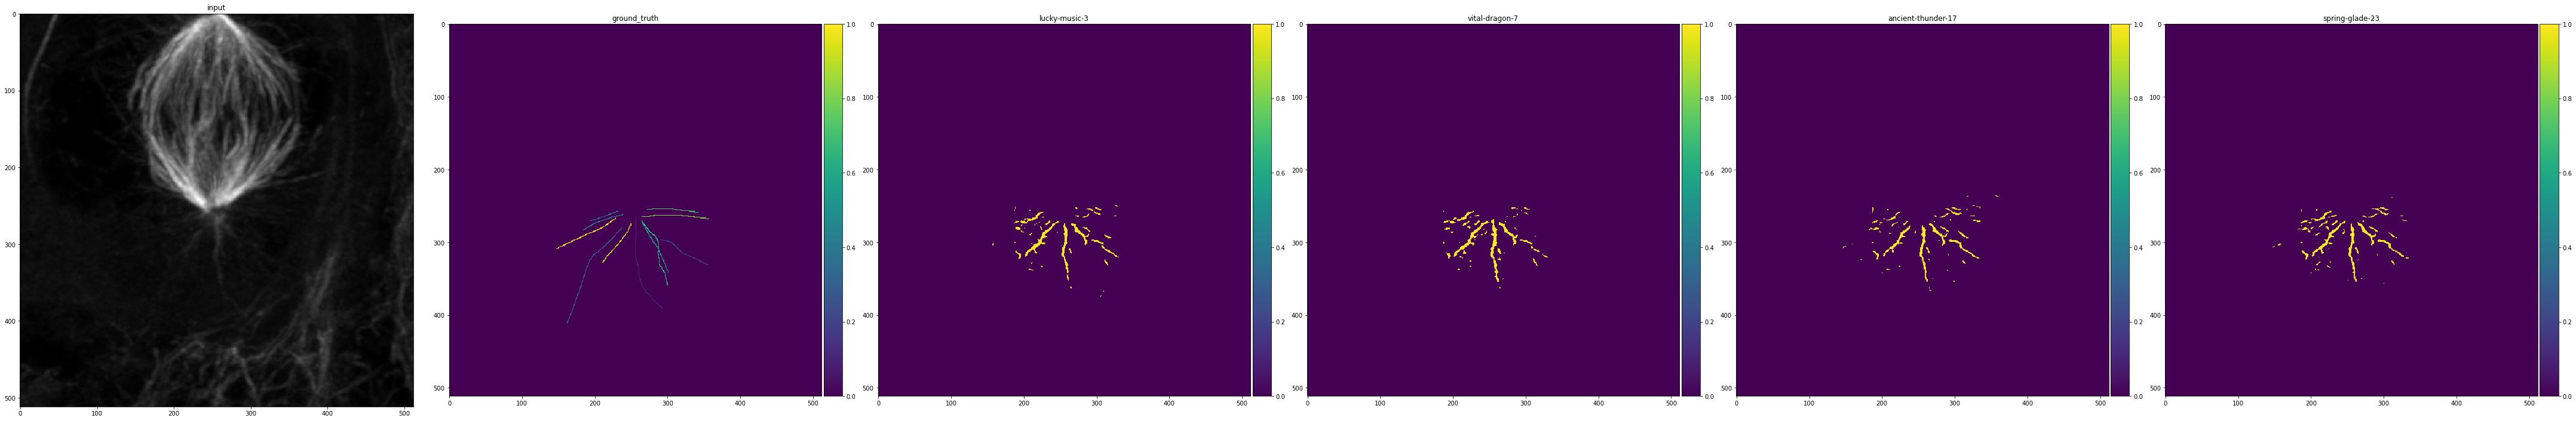

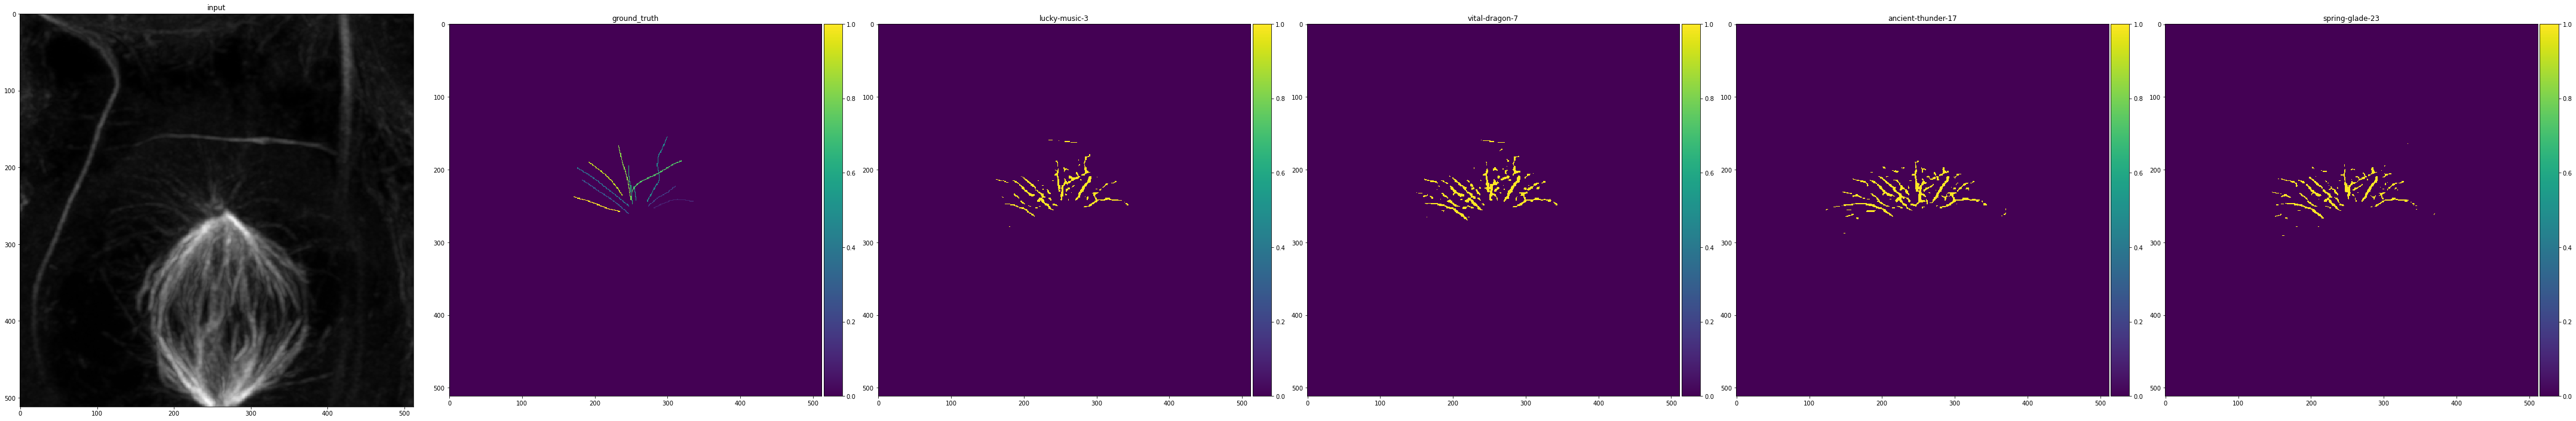

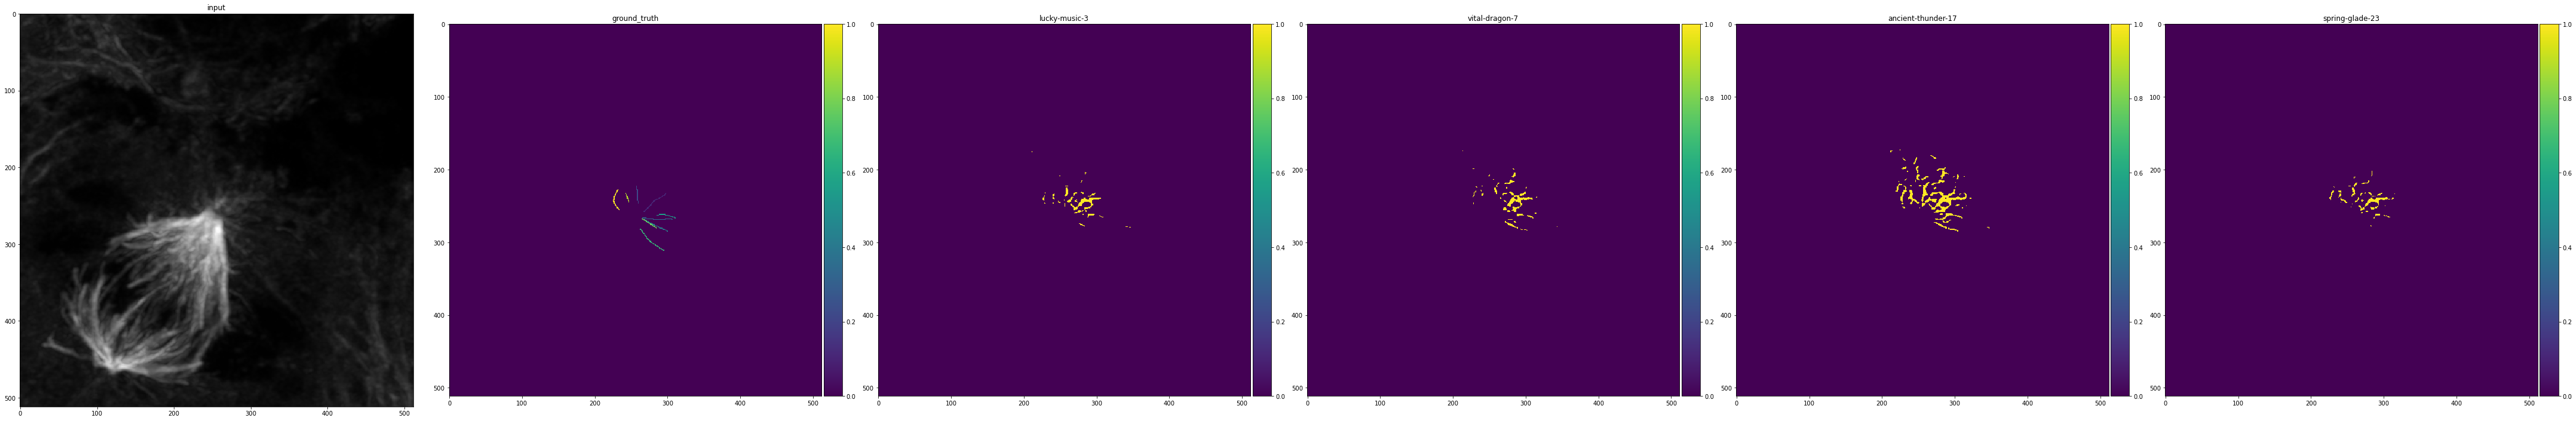

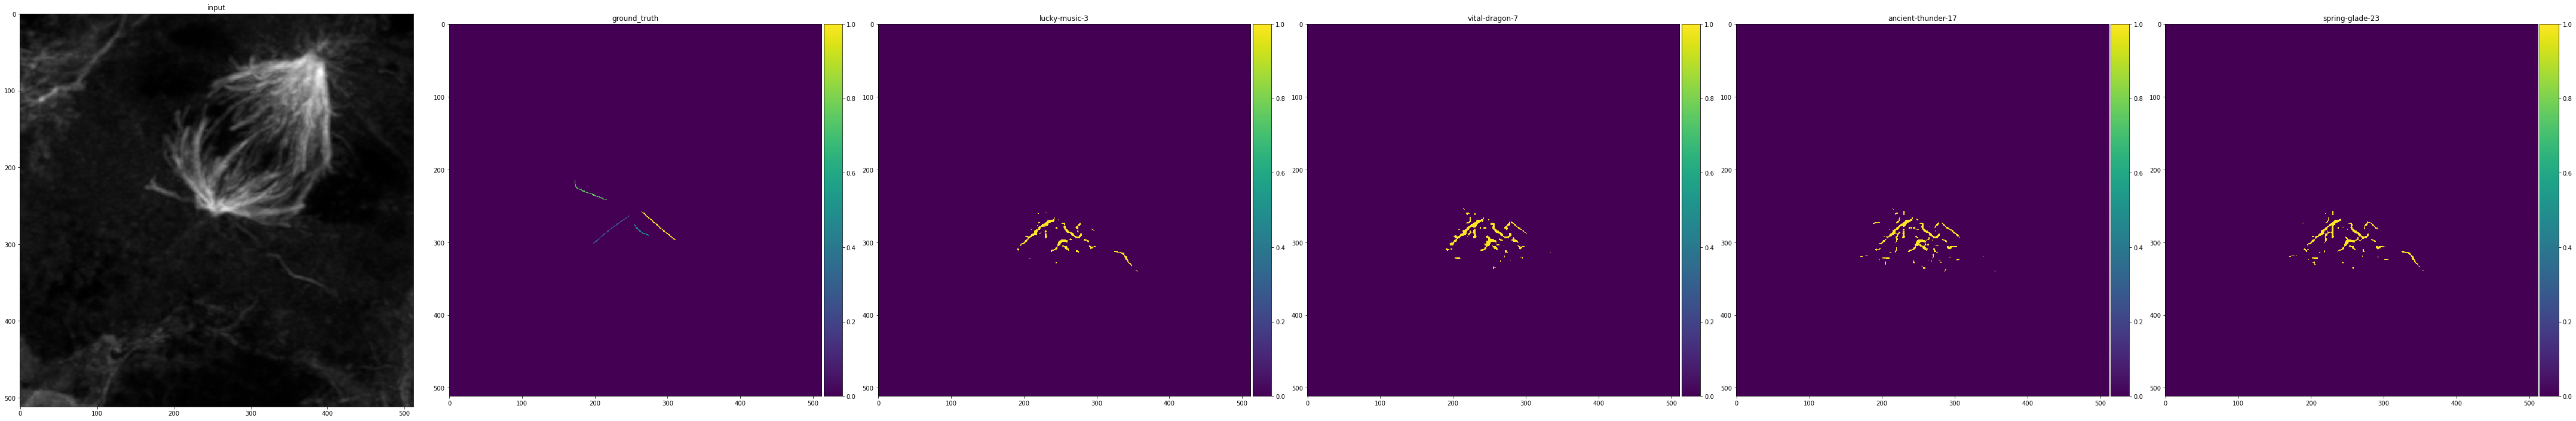

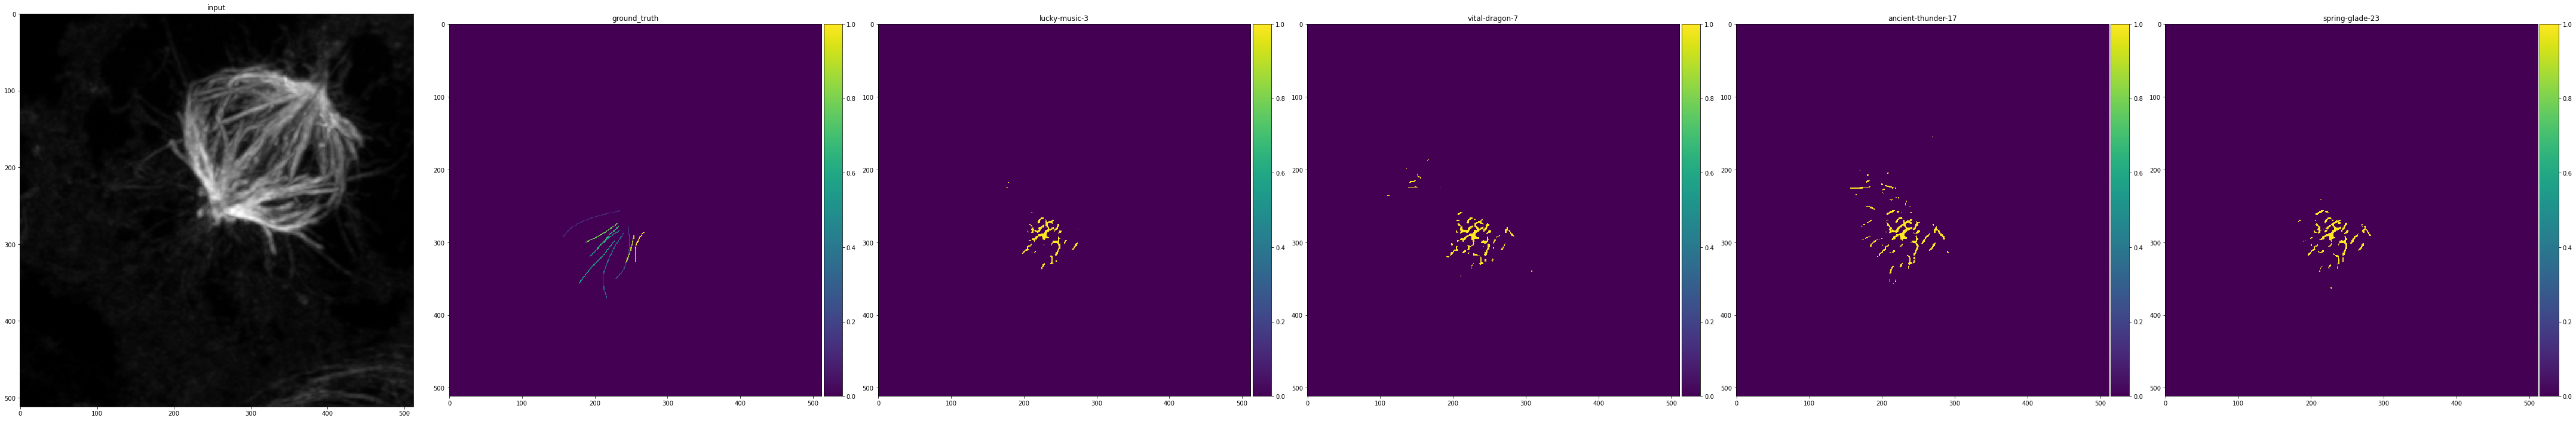

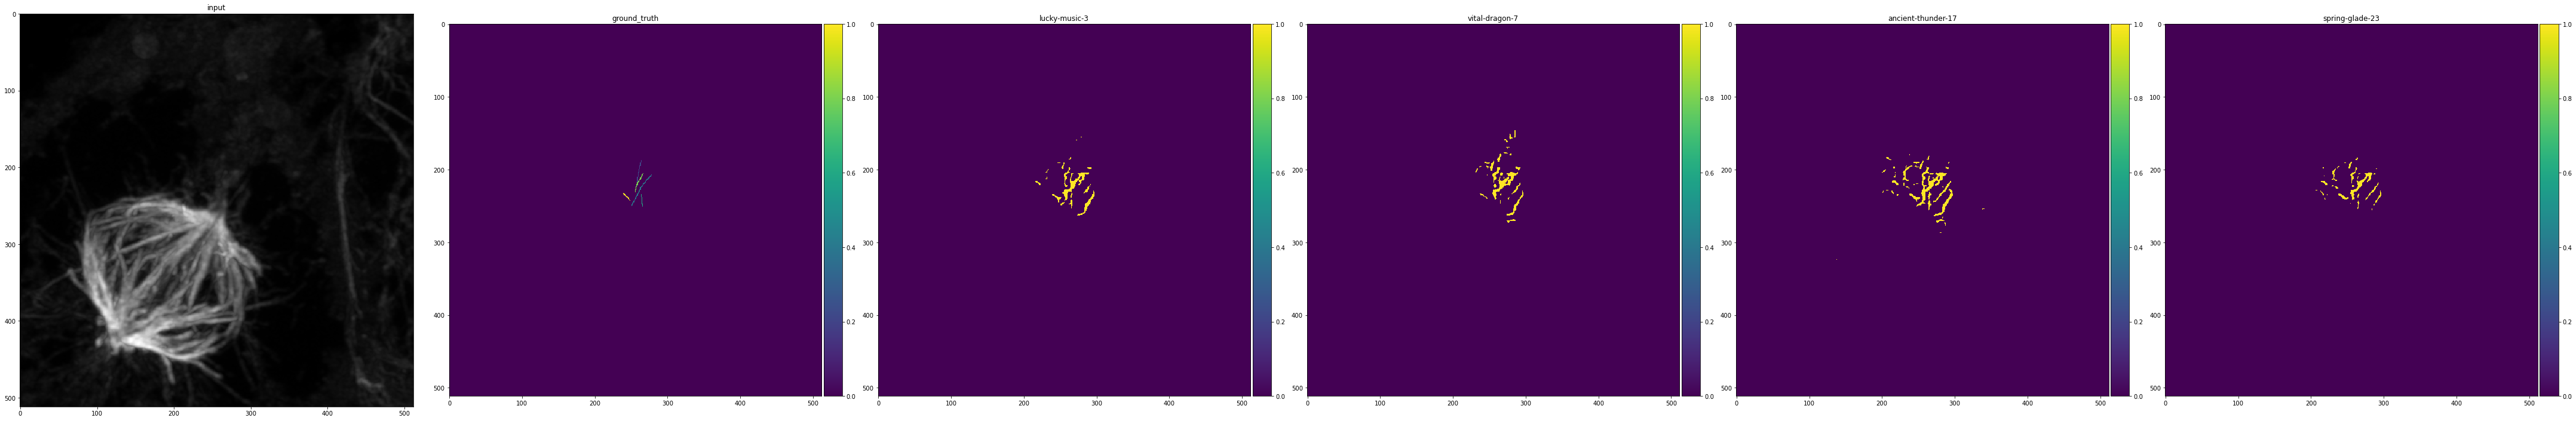

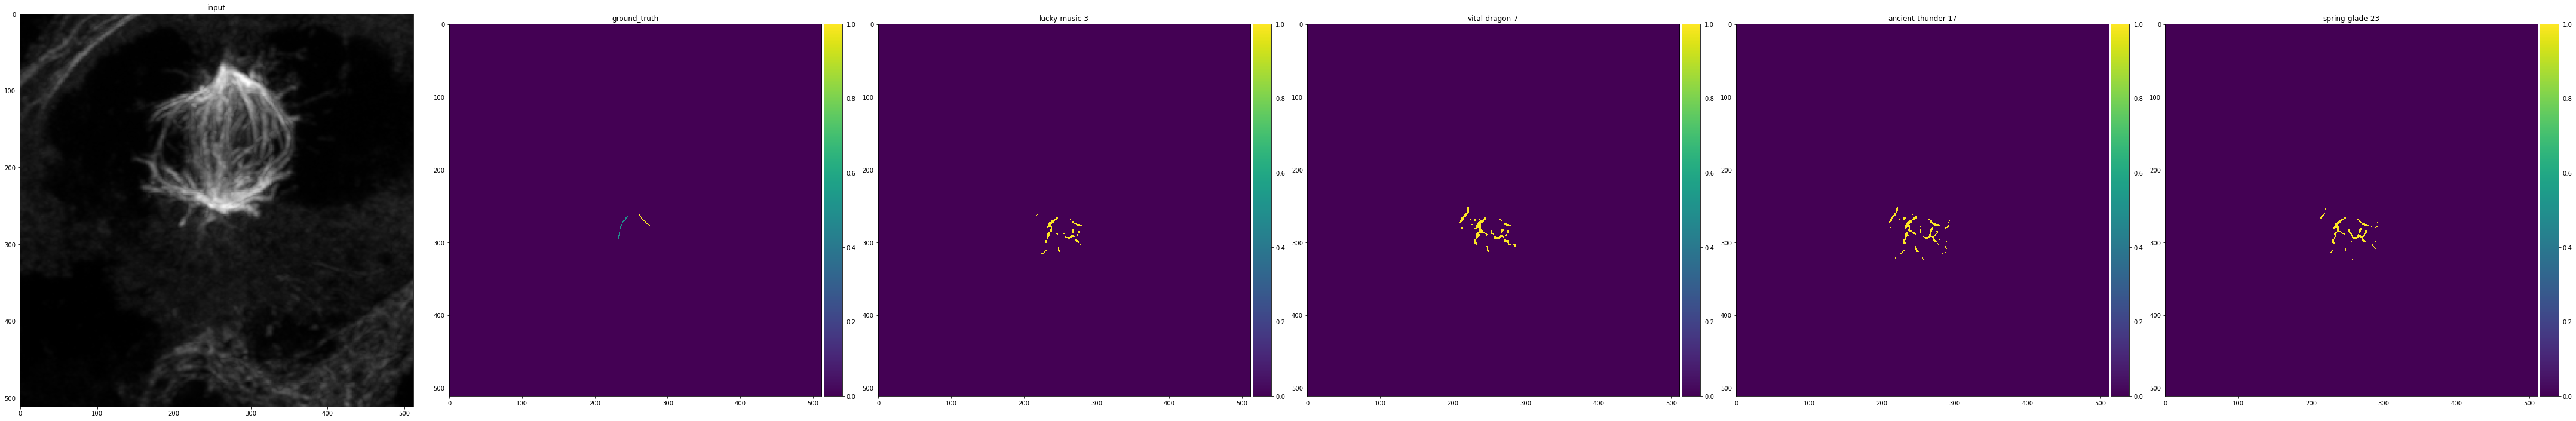

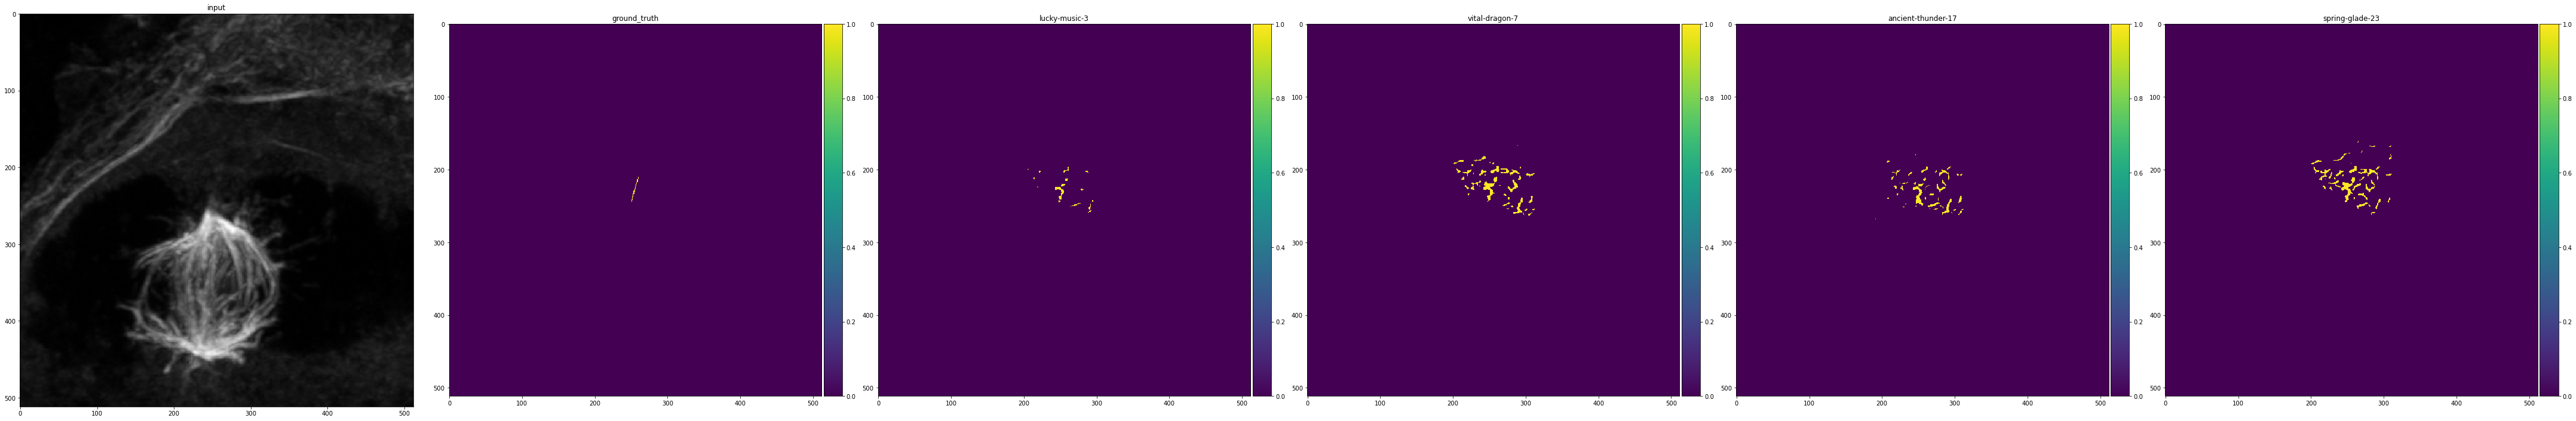

In [6]:
# plot predictions
for i, (imgs, _, targets) in enumerate(val_dl):
    predictions = [outputs[j][i][ind] for j in range(len(outputs))]
    show_imgs([imgs[ind][0], targets['labeled_mask'][ind]] + predictions, s=10, norm=True,
              titles=['input', 'ground_truth'] + models)